<a href="https://colab.research.google.com/github/Teejaymenda/insights_from_data/blob/main/predicting_a_game_of_chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/COMP_3400/Final_project/games.csv')


Mounted at /content/drive


#Model to predict the outcome of a chess game using its Atttributes
>Here we have data set full of attributes that are been recoredered on a popular website [lichess.org](https://lichess.org/) Here we are using these attributes to create a model to predict the oucome of a chess game. We believe that this model gonna be useful when it comes to betting and other type of usecases where predicting the outcome of a chessgame is useful.
---
## Which attributes to include. 
>Here aligining with our initial goal we need to concentrate the attributes which are present at the begining of a game. And the attribute of the outcome of a game (which is the response variable in this scenario).
### Breif description of each attribute
>Here we are describing the attributes of the data set and justify whether that variable needs to be included or not, considering our initial goal and usefullness to our model. According to the guidelines of the project we obtained a dataset which has 16 attributes and 20058 data fields. 
- Game ID -<br /> This field is the primary key of the Database this attribute doe not hold any value regarding predicting the outcomes of a game. So this won't be included in our model.
- Rated (T/F) - <br />Here the player has the option to select whether he is going for a rated game or unrated game rated games affect the personal rating of the player so if a player choses a retd game option that he is playing much more seriously than a casual game.
- Start Time - <br /> This is the time at which a game started but this variable does not have any impact on the winning its very obvious so we don't take this attribute to our model.
- End Time - <br /> This is the time when the last move was executed but we need to predict a game at the begining so this attribute is not useful.
- Number of Turns - <br /> This is also an attribute we can obtain at the end of a game so 
- Game Status -<br /> this attribute contains the information of how the game concluded but here in this context we are planning to predict the winner of the game and that's our response variable so we cannot include this in our model.
- Winner -<br /> This is our response varible or the 'Y' attribute or the attribute we want to predict using the model. 
- Time Increment -<br /> This is a time increment protocol that decided before a game so the first number refers to a total time the player has and the subsequent number refers to how much time added after each move to his clock. Since this attribute is decided before a game we can add this attribute to our model. As a categorical variable.
- White Player ID - <br /> This is again a primary key of a database to address each player which does not hold value in predicting the outcome.
- White Player Rating - <br /> This varibale is very important and it contains the information regarding how good player he/she is. And this attribute will be used in the model.
- Black Player ID - <br /> This is the same as white player ID attribute which we clearly do not have any use
- Black Player Rating - <br /> This is the same attribute as a white player rating we nned to accumulate this variable in our model.
- All Moves in Standard Chess Notation - <br /> This attribute records all moves in standard notation since this attribute can be obtained at the end of the game this attribute cannot be included in our model.
- Opening Eco - <br /> This is an attribute where you can see a code is assign to different types of openings in a chess game. In order to gain more information on that click [Here](https://www.365chess.com/eco.php/), But this attribute is crticial in our model since a game depends on how it starts.
- Opening Name - <br /> This is the name of the opeing of the chess game basically the previous attribute has a code and this attribute has the name that corresponds to that code.
- Opening Ply - <br /> This is the number of moves a player play in an opening phase So this attribute can be incorporated into our model. Sinice we predict the outcome after the opening phase. 

---
So here after going through the attributes we are given a some attributes of a chess game after its opening phase and we are using that attributes to predict the outcome of the game.


In [ ]:
#df.isna().sum() #there are no missing values in this data set
""" Here we need to drop the attributes that are not suitable for our model 
(referab ove description)"""
filtered_out_columns=['id','created_at','last_move_at','turns','victory_status',
                      'white_id','black_id','moves','opening_eco'] 
df_filtered=df.drop(filtered_out_columns,axis=1)
#Now we need to rearrange the data set 

df=df_filtered.loc[:,['rated','white_rating','black_rating','increment_code','opening_name','opening_ply','winner']]
df.shape
condition_drop = ~(df['winner']=='draw')
df=df[condition_drop]
df.shape

(19108, 7)

True     15436
False     3672
Name: rated, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


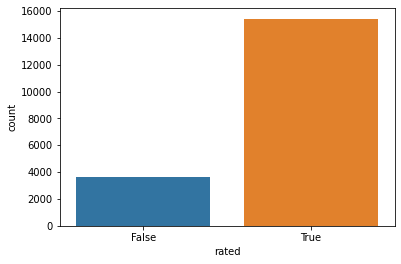

In [ ]:
# Here we are trynig to see how each attribute is distributed
#Rated a Cathegorical attribute
print(df['rated'].value_counts())
sns.countplot(df['rated'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


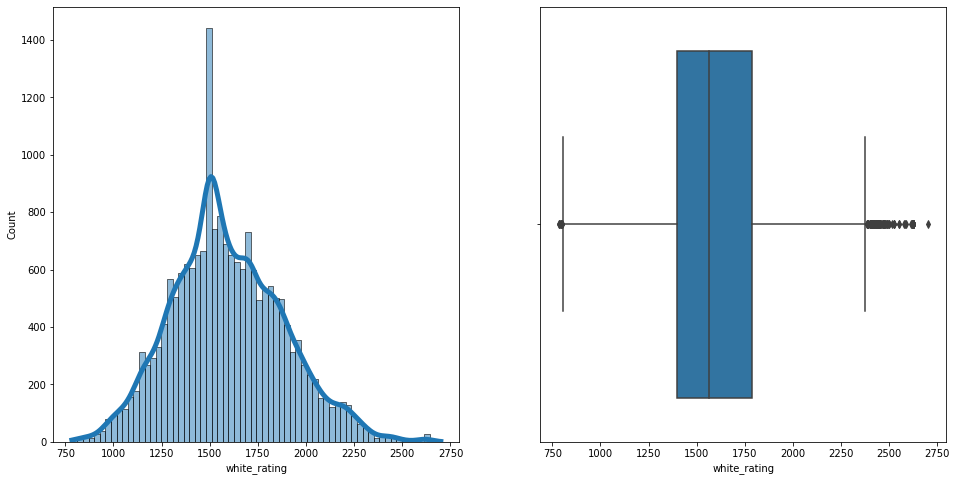

In [ ]:
# Here we are trying to see the spread of the numerical variable white rating
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
sns.histplot(df['white_rating'],ax=axs[0],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
sns.boxplot(df['white_rating'],ax=axs[1])

### White Rating
---
Here we can see that when we avoid the outliers the quantitaive variable of white rating exhibits a normal distribution. but the frequency of the mode is extremly high in reation to the rest.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


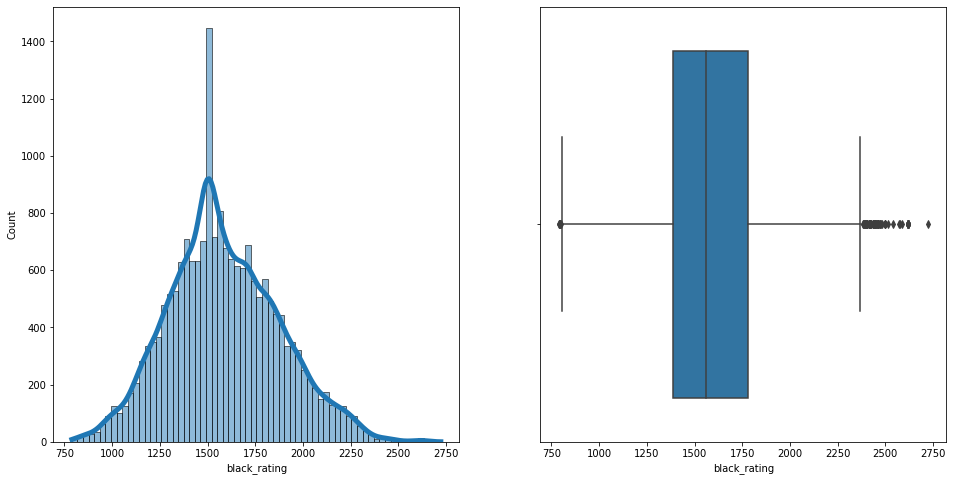

In [ ]:
# Here we are trying to see the spread of the numerical variable black rating
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
sns.histplot(df['black_rating'],ax=axs[0],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
sns.boxplot(df['black_rating'],ax=axs[1])

### Black Rating
---
When it comes to the quantitaive variable of black rating we can see a pretty much identical distribution to the white rating the reason may it is the same players who choose diffferent colours at each turns.So both the variables show the distribution of the rated players who are playing on LIchess. But considering how ofte each player gets white or black we can see a very miniature difference between distributions (which should not be recognised at all). 

In [ ]:
#Here we are trying to see the distrbution of the categorical attribute Increment_code
df['increment_code'].value_counts().count()


394

###increment code
---
This also a categorical variable with lot of instances in the category but here i have an issue of plotting this variable since i have read some litearure about treating categorical variables and it says if a variable has a large number of categories then it should be treated as a quantitative variable. I have drawn a categorical count plot for this and that plot doesn't show any information due to the above stated issue.

In [ ]:
#Here we are trying to see the distribution of the categorical variable opening_name which is categorical variable
#sns.countplot(df['opening_name'])
df['opening_name'].value_counts().count()


1453

###opening name
---
Here again i encounter the same problem that i faced when i was working with the previous categorical variable . this also has 1477 categories. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


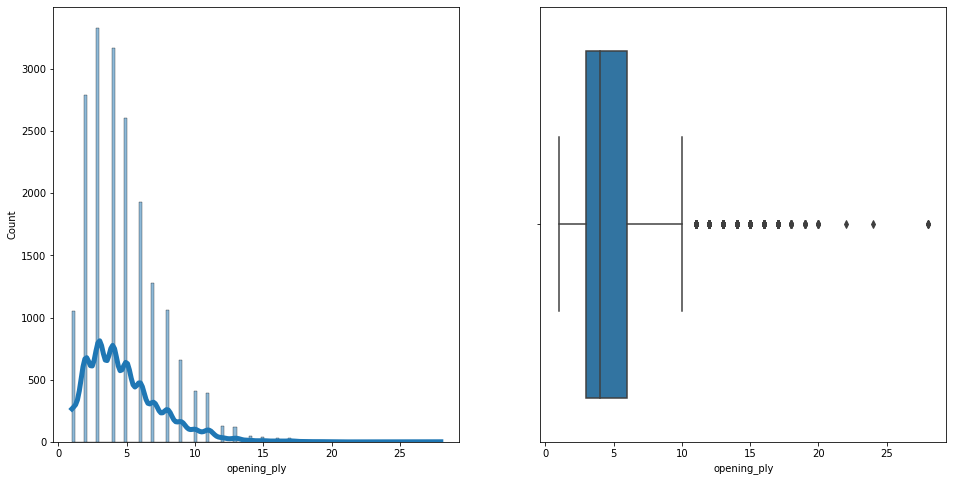

In [ ]:
#here we are trying to see the distribution of the quantitaive variable opening_ply
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
sns.histplot(df['opening_ply'],ax=axs[0],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
sns.boxplot(df['opening_ply'],ax=axs[1])


###Opening Play
---
Here this variable has a positiveily skewed gamma distribution from the hitogram and from the box plot we can clearly see that it has lot of outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


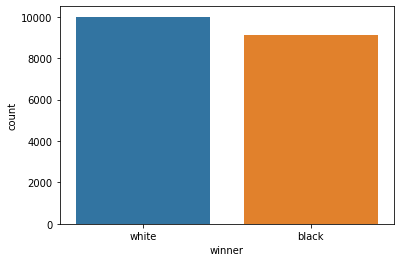

In [ ]:
# Here we are tring to see the distribution of the response variablle winner
sns.countplot(df['winner'])

### Winner
---
Here when we analyse the response variable Winner which is a categorical variable we can clearly see that majority of the games are won by the white while the percentage of draw games are very few

## Some cross attribute analysis regarding how each attribute distribute against each other
---

###Rated vs Winner
---
Here we try to plot the attribute Rated vs Winner using a countplot, When we plot we can see that distribution of the rated mathses vs Unrated mathes is almost identical so if we take the difference between the games that ended in a decision vs games eneded in a draw playing a raetd match vs urated math hasn't done much of an effect.

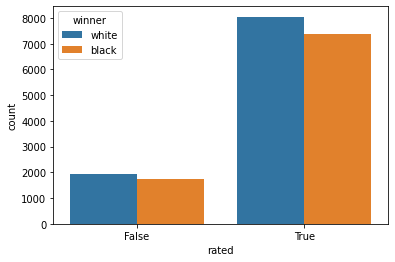

In [ ]:
#Here we tyry to see a relationship between rated vs end result of a game.
sns.countplot(data=df, x="rated", hue="winner")

###Rating vs winner
---
Here we try to see the relationship between a quantitaive attribute 'Raings' vs a qualitative attribute winner and we have used both black and white raing in this since the color they play at each game is only relevant to that game but the raing isunique to each player so if we look at that scatter plot we can see thatmajority of the games were won by the player with higher rating it can be clearly seen if we draw an imaginary line x=y in this scatter plot anything above that line is black player's rating is greater than white players rating so majority of those points belong to the black player while the majority of the points that are below that imaginary line you can see belongs to the white polayer because below that x=y line the white players rating is higher than the black players rating. so the rating clearly plays a role in determining the winner. 'Winner' 

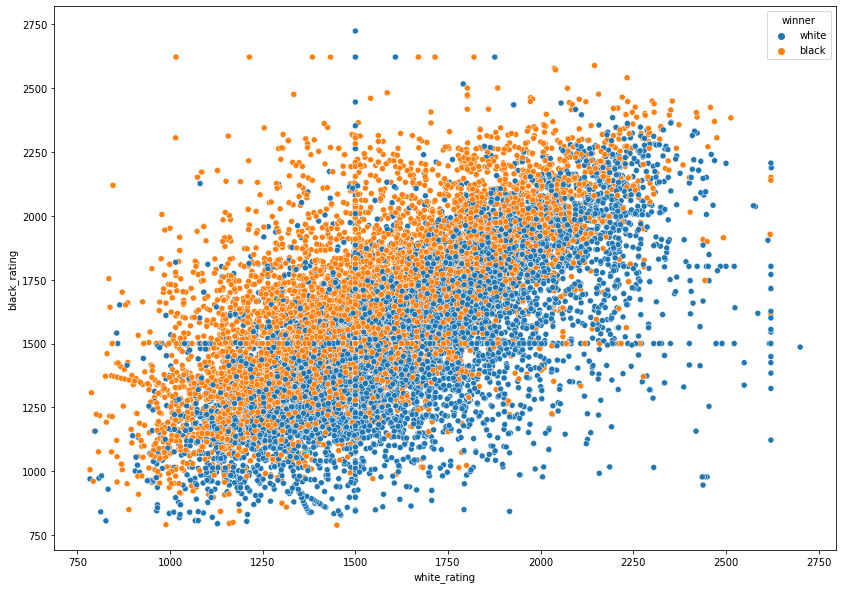

In [ ]:
fig = plt.gcf()
fig.set_size_inches(14, 10)
fig=sns.scatterplot(data=df,x="white_rating",y="black_rating",hue="winner")

###opeing ply vs winner
------------------------
Here we try to see the relationship between two categorical attributes opening ply vs winner . But how opening ply may effect the match end up being a decisivce or draw. So we look at the grouped count plot of each opening ply instances of this we can clearly see that opening ply does not have effect on match being end up with a decision or draw.Nevertheless opening play instances have a clear effect on who is winning the match because in a game normally white starts the match so opening play might have an effect over the winner of the match. opening play = 1 black has a higher chance of winning.

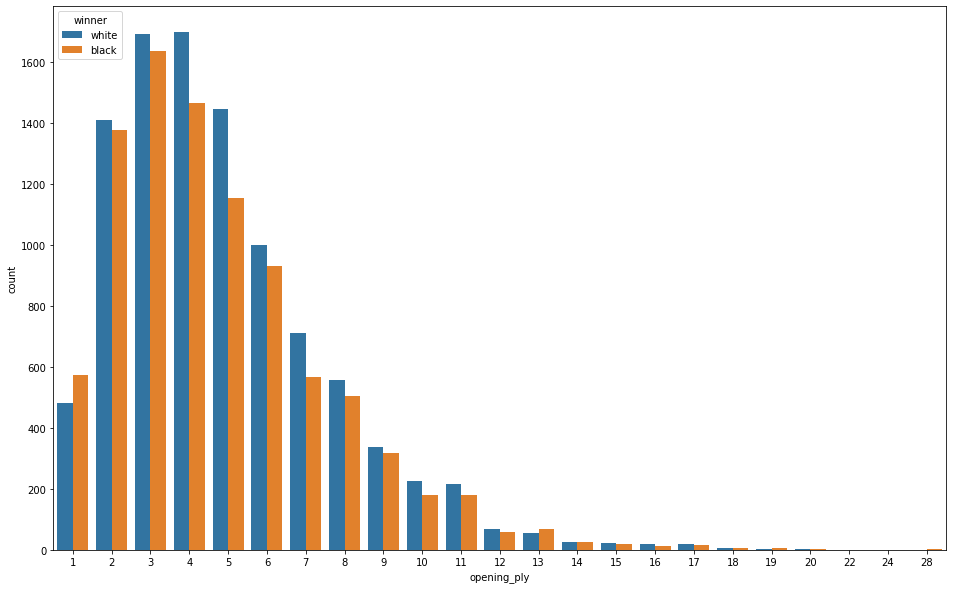

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.countplot(data=df, x="opening_ply", hue="winner")

##Part 2 -Data Cleaning

###Dealing with outliers
---
In this step we will create a mechanism to analyse outliers and remove them from the datas et since this dataset contains 20,058 data data points we don't have any need to replace them with Mode or median or mean (if this is a samll data set instead of removing we need to impute data depending on the type and the distribution of the attribute).<br />
Here In oreder to identify the outlines we are using the quantile range method so here we calculate the IQR(Inter quantile range) and defines the normal data range with Q<sub>1</sub>  - 1.5 IQR amd upeer limit as Q<sub>3</sub> +1.5 IQR Any data lies outside this range is considered as an outlier 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


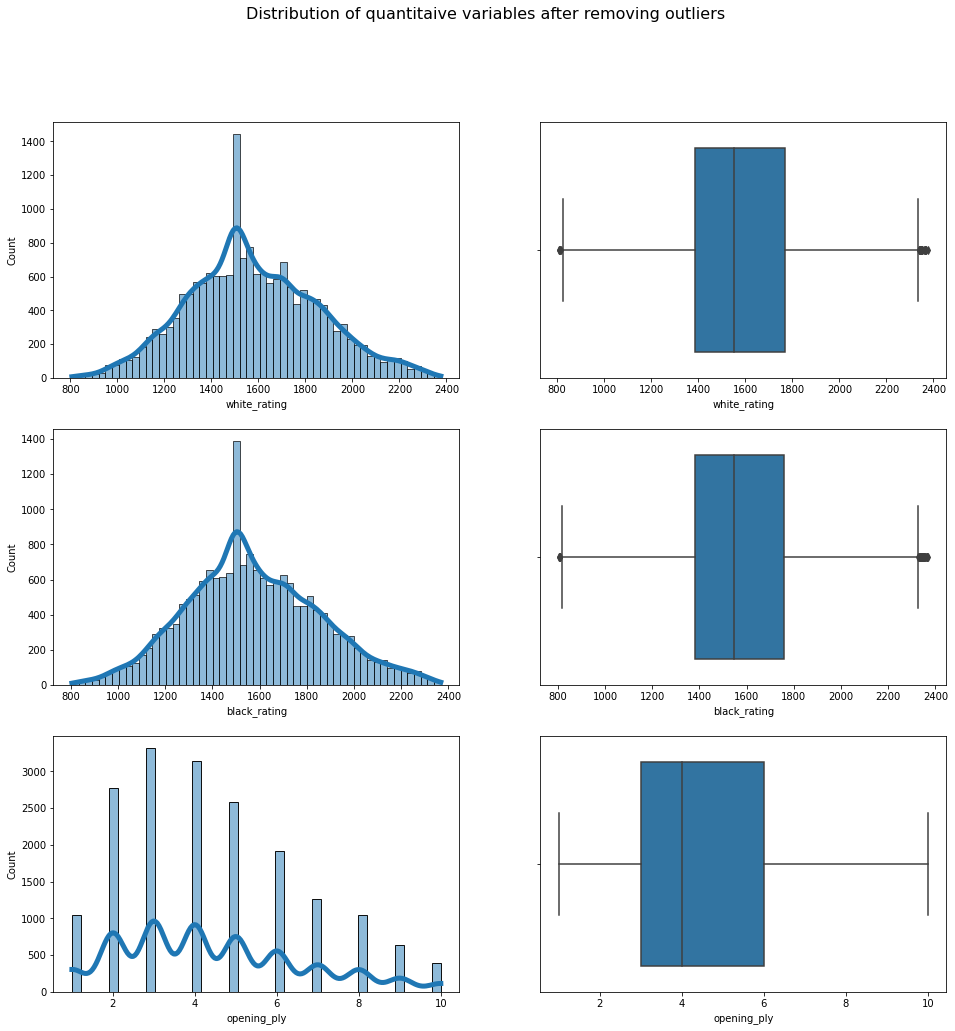

In [ ]:
# First we select the quantitaive varibales. and we select outliers form that
quant_col_headers = ['white_rating','black_rating','opening_ply'] 
Q1 = df[quant_col_headers].quantile(0.25) 
Q3 = df[quant_col_headers].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df[quant_col_headers] < (Q1 - 1.5 * IQR)) | (df[quant_col_headers] > (Q3 + 1.5 * IQR))).any(axis=1)
condition_2 = ((df[quant_col_headers] < (Q1 - 1.5 * IQR)) | (df[quant_col_headers] > (Q3 + 1.5 * IQR))).any(axis=1)
df_original=df.copy()
df_original_2=df.copy()
df = df[condition]
df_outliers=df_original_2[condition_2]
fig, axs = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(16, 16)
fig.suptitle("Distribution of quantitaive variables after removing outliers",fontsize=16)
sns.histplot(df['white_rating'],ax=axs[0,0],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
sns.boxplot(df['white_rating'],ax=axs[0,1])

sns.histplot(df['black_rating'],ax=axs[1,0],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
sns.boxplot(df['black_rating'],ax=axs[1,1])

sns.histplot(df['opening_ply'],ax=axs[2,0],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
sns.boxplot(df['opening_ply'],ax=axs[2,1])

##Iteration 2
---
###Encoding of Data
---
In my data set i have lot of variables which are categorical and some categorical variables have a very high cardinality so first i will encode the categorical variables to quantitaive variables so that my model can process them.
 *Rated T/F* - <br />
---
For this attribute which only has two instances and those instances have no ordering we can use one hot encoding since the Rated variable is a nominal variable without any order. So in this instance we use the tecnique of replacing a categorical variable with k instances with k-1 dummy variables. since the cardinality is 2 we can use label encoder method for one hot encoding.



In [ ]:
#Converting Rated T/f
df_rated=preprocessing.LabelEncoder().fit_transform(df['rated'])
df['rated']=df_rated
df.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0,1500,1191,15+2,Slav Defense: Exchange Variation,5,white
1,1,1322,1261,5+10,Nimzowitsch Defense: Kennedy Variation,4,black
2,1,1496,1500,5+10,King's Pawn Game: Leonardis Variation,3,white
3,1,1439,1454,20+0,Queen's Pawn Game: Zukertort Variation,3,white
4,1,1523,1469,30+3,Philidor Defense,5,white
6,1,1520,1423,10+0,Blackmar-Diemer Gambit: Pietrowsky Defense,10,white


*Increment code* -<br/>
---
For the categorical attribute increment code we can see that it has high cardinality so in this scenario we cannot use one hot encoding or ordinal encoding. So we have to use frequency encoding.


In [ ]:
df_frequency_map=df['increment_code'].value_counts().to_dict()
df.increment_code=df.increment_code.map(df_frequency_map)
df.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0,1500,1191,86,Slav Defense: Exchange Variation,5,white
1,1,1322,1261,138,Nimzowitsch Defense: Kennedy Variation,4,black
2,1,1496,1500,138,King's Pawn Game: Leonardis Variation,3,white
3,1,1439,1454,409,Queen's Pawn Game: Zukertort Variation,3,white
4,1,1523,1469,6,Philidor Defense,5,white
6,1,1520,1423,7063,Blackmar-Diemer Gambit: Pietrowsky Defense,10,white


*Opening Name*
---
For this particular categorical attribute the cardinality is 1420 because of that the only encoding we can use is frequency encoding.

In [ ]:
df_frequency_map=df['opening_name'].value_counts().to_dict()
df.opening_name=df.opening_name.map(df_frequency_map)
df.head(5)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0,1500,1191,86,19,5,white
1,1,1322,1261,138,5,4,black
2,1,1496,1500,138,150,3,white
3,1,1439,1454,409,107,3,white
4,1,1523,1469,6,126,5,white


*Winner*
---
For the winner variable we have to go for one hot encoding because there is no order. and it is a binary field. Initially this variable has 3 outcomes but since the classification algorithms only work with two outcomes all the data points in which the value of this field was "Draw" has been omitted from the data set.\

In [ ]:
df_winner=preprocessing.LabelEncoder().fit_transform(df['winner'])
df['winner']=df_winner
df.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0,1500,1191,86,19,5,1
1,1,1322,1261,138,5,4,0
2,1,1496,1500,138,150,3,1
3,1,1439,1454,409,107,3,1
4,1,1523,1469,6,126,5,1
6,1,1520,1423,7063,2,10,1


###Part 2 - Scaling of data
---


In [ ]:
type(df)

pandas.core.frame.DataFrame

*How scaling affect the dataset*
---
In this section as per the requirements all the scaling methods of the notes have been applied to this dataset. The original dataset and the scaled dataset have been compared using graphs for each attribute side by side in order to see the difference between eachscaling and how it affects the dataset.

In [ ]:
df_copy = df.copy() #We create a copy so we can still refer to the original dataframe later
scaler = MinMaxScaler()
df_columns = df.columns
df_scaled_minmax = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_columns)
df_scaled_minmax.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0.0,0.441683,0.247442,0.012036,0.051282,0.444444,1.0
1,1.0,0.328235,0.292199,0.019400,0.011396,0.333333,0.0
2,1.0,0.439133,0.445013,0.019400,0.424501,0.222222,1.0
3,1.0,0.402804,0.415601,0.057774,0.301994,0.222222,1.0
4,1.0,0.456342,0.425192,0.000708,0.356125,0.444444,1.0
5,1.0,0.454430,0.395780,1.000000,0.002849,1.000000,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

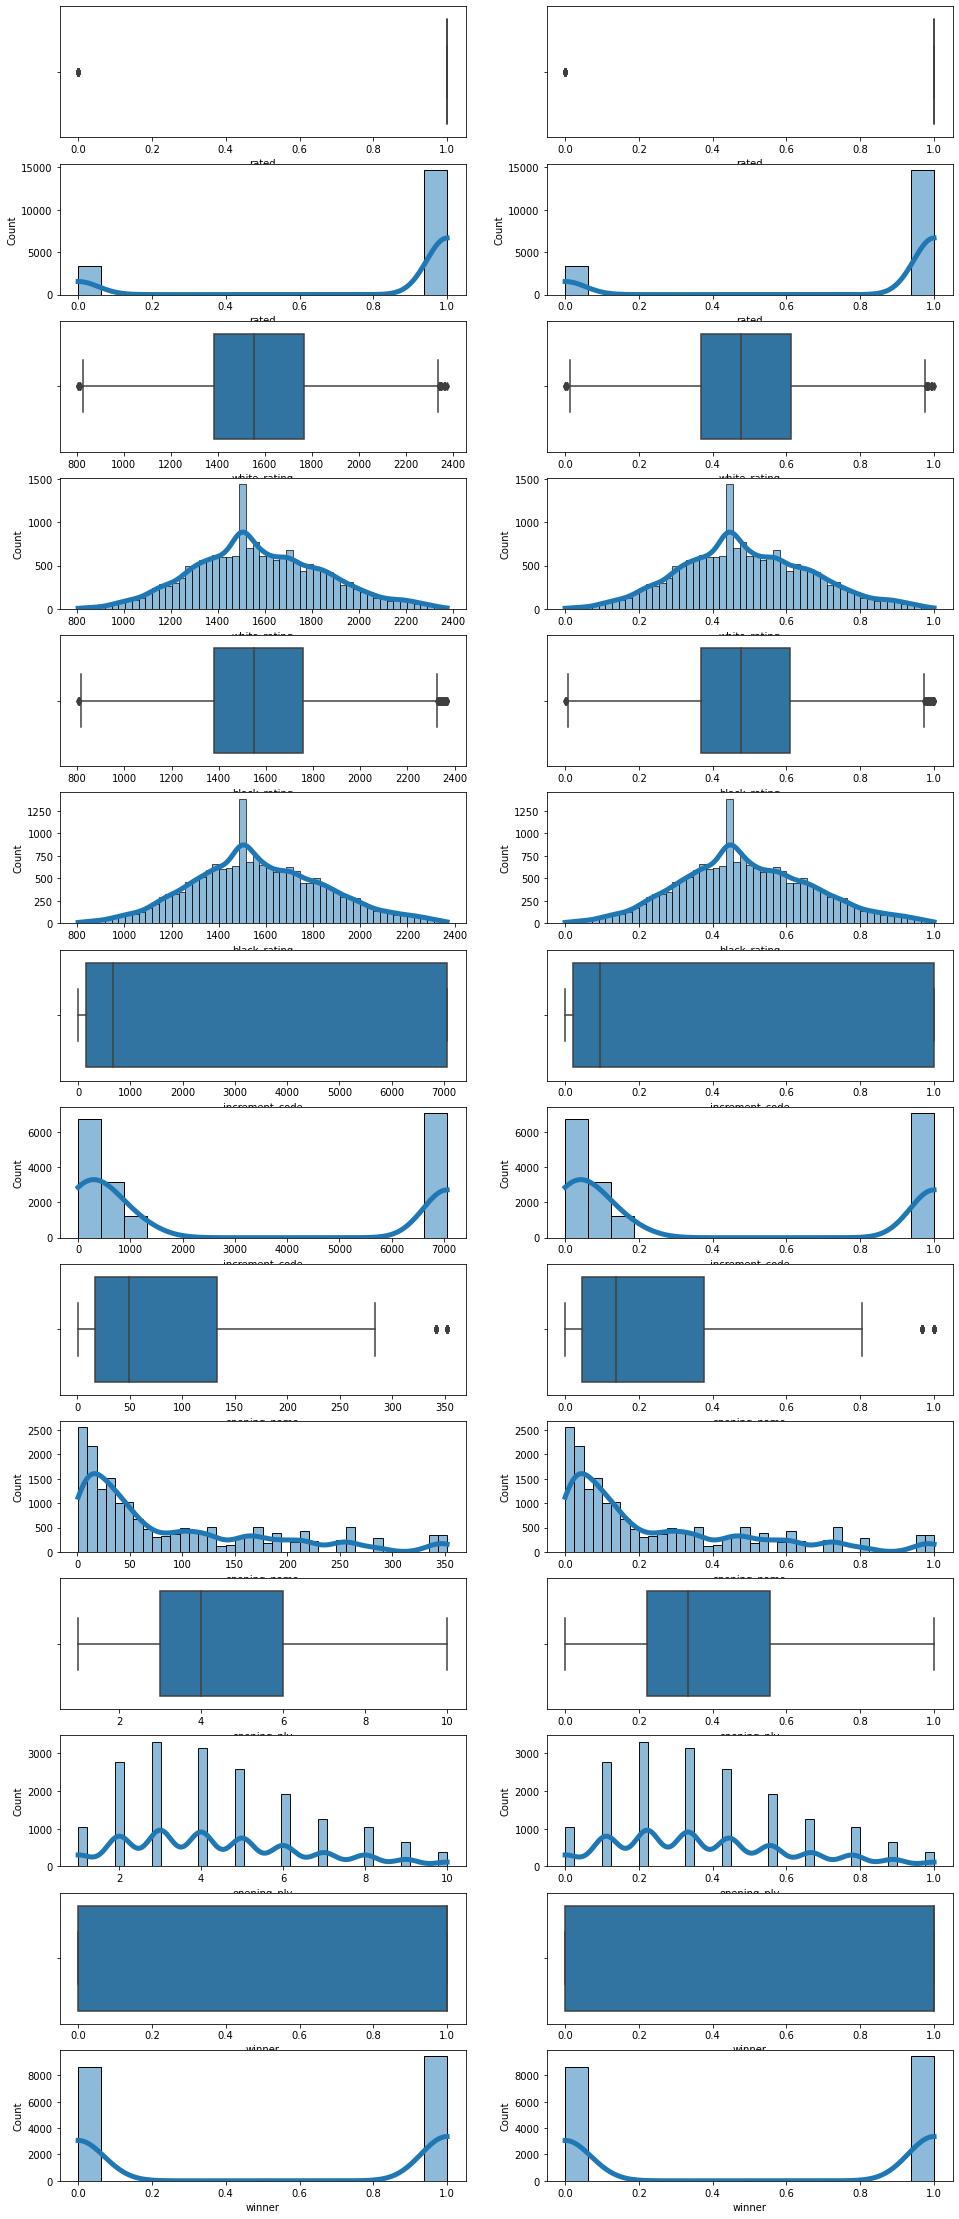

In [ ]:
# here i have created a function to get the plots so i don't have to repeat coding the same thing
def get_the_plot(df1,df2):
  fig, axs = plt.subplots(nrows=14,ncols=2)
  fig.set_size_inches(16, 40)
  l=0
  for i in df1.columns:
    sns.boxplot(df1[i],ax=axs[l,0])
    sns.histplot(df1[i],ax=axs[l+1,0],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
    l=l+2
  l=0
  for i in df2.columns:    
    sns.boxplot(df2[i],ax=axs[l,1])
    sns.histplot(df2[i],ax=axs[l+1,1],kde=True,line_kws={'color': 'Crimson', 'lw': 5})
    l=l+2
get_the_plot(df,df_scaled_minmax)


*MinMax scaling*
---
The above diagram compares how the minmax scaling affect the dataset and its distribution in terms of the distribution the scale has benn reduced as expected but in terms of the distribution it has not been affected.

In [ ]:
df_copy = df.copy() #We create a copy so we can still refer to the original dataframe later
scaler = MaxAbsScaler()
df_columns = df.columns
df_scaled_maxabs = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_columns)
df_scaled_maxabs.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0.0,0.631313,0.502956,0.012176,0.053977,0.5,1.0
1,1.0,0.556397,0.532517,0.019538,0.014205,0.4,0.0
2,1.0,0.629630,0.633446,0.019538,0.426136,0.3,1.0
3,1.0,0.605640,0.614020,0.057907,0.303977,0.3,1.0
4,1.0,0.640993,0.620355,0.000849,0.357955,0.5,1.0
5,1.0,0.639731,0.600929,1.000000,0.005682,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

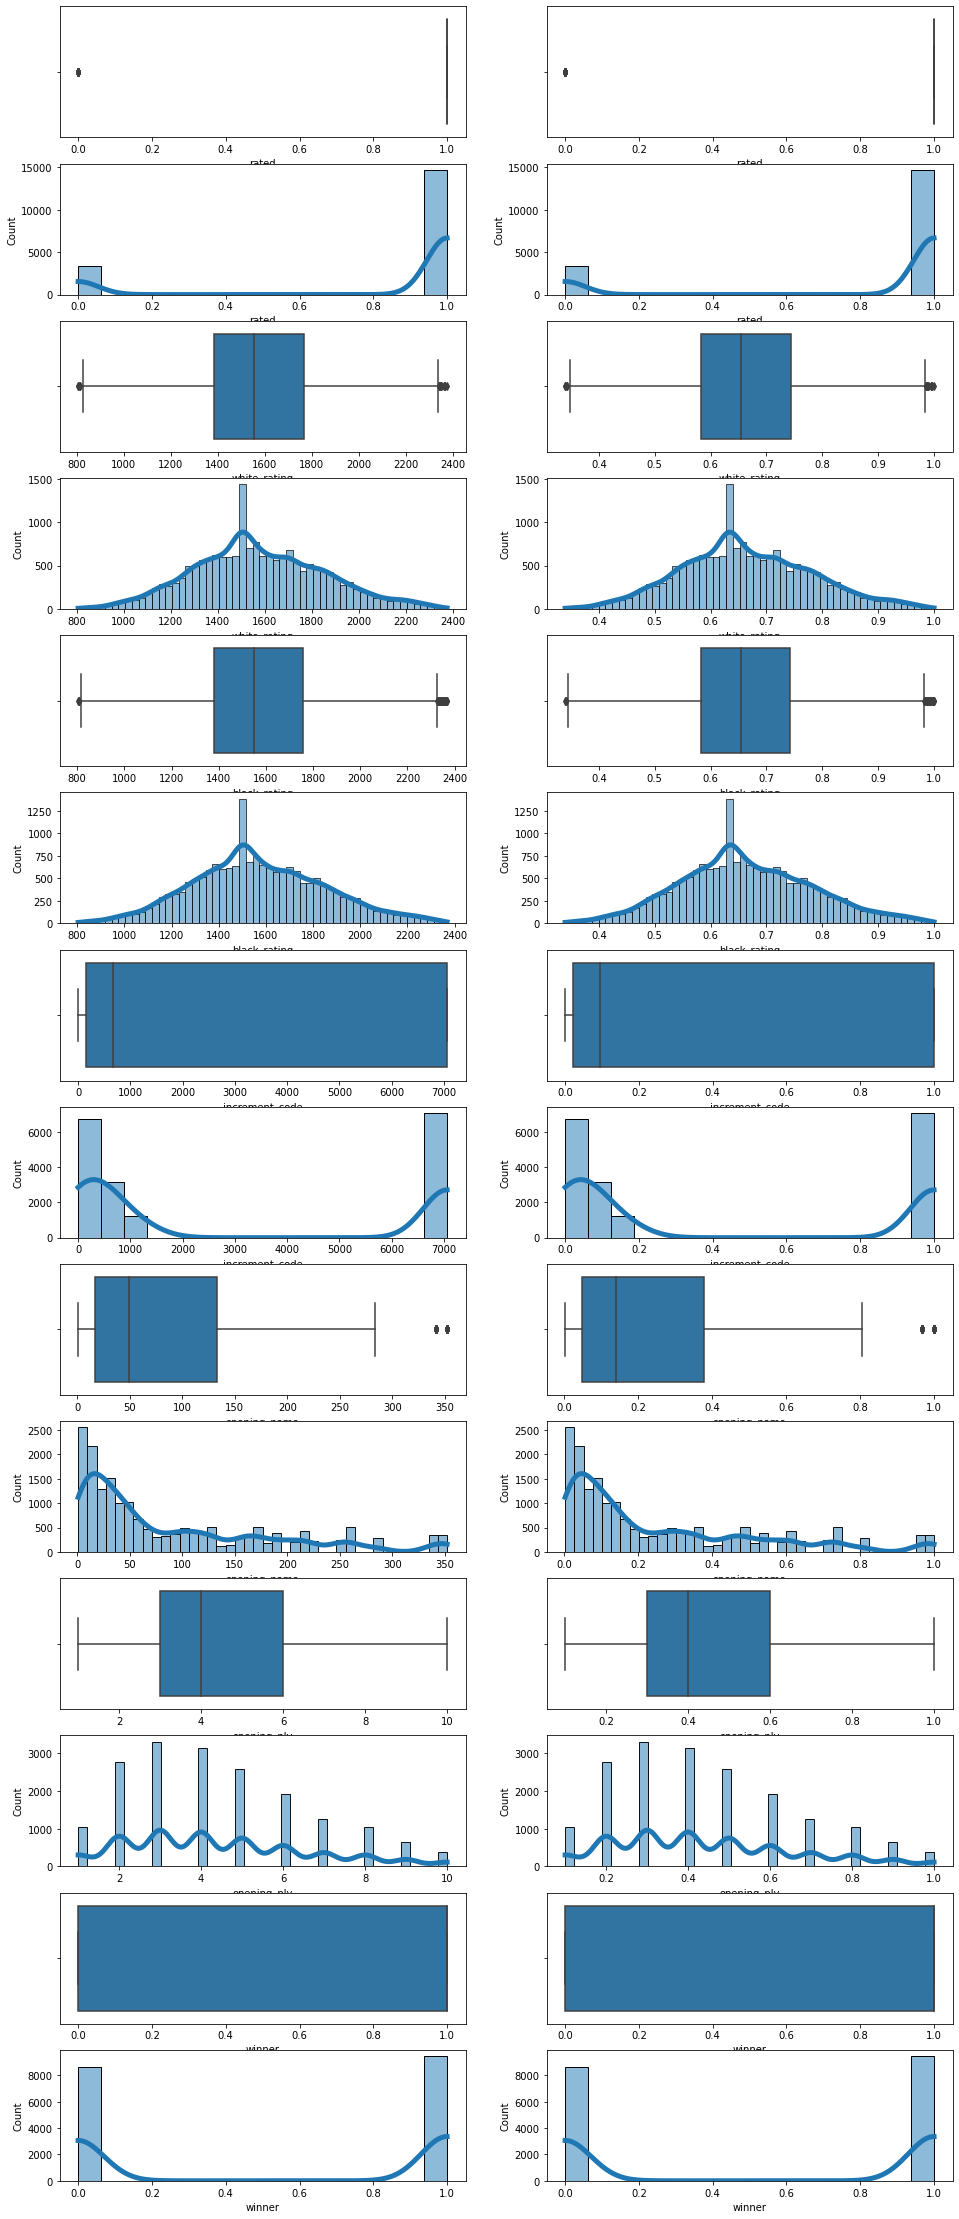

In [ ]:
get_the_plot(df,df_scaled_maxabs)

*MaxAbs scaler*
---
Interms of maxabs scalar it also shows a similar behaviour like the minmax scalar the distribution hasn't got affected but the scale has benn changed.

In [ ]:
df_copy = df.copy() #We create a copy so we can still refer to the original dataframe later
scaler = RobustScaler()
df_columns = df.columns
df_scaled_robus = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_columns)
df_scaled_robus.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,-1.0,-0.139382,-0.944444,-0.082815,-0.258621,0.333333,0.0
1,0.0,-0.607495,-0.759259,-0.075300,-0.379310,0.000000,-1.0
2,0.0,-0.149901,-0.126984,-0.075300,0.870690,-0.333333,0.0
3,0.0,-0.299803,-0.248677,-0.036132,0.500000,-0.333333,0.0
4,0.0,-0.078895,-0.208995,-0.094378,0.663793,0.333333,0.0
5,0.0,-0.086785,-0.330688,0.925567,-0.405172,2.000000,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

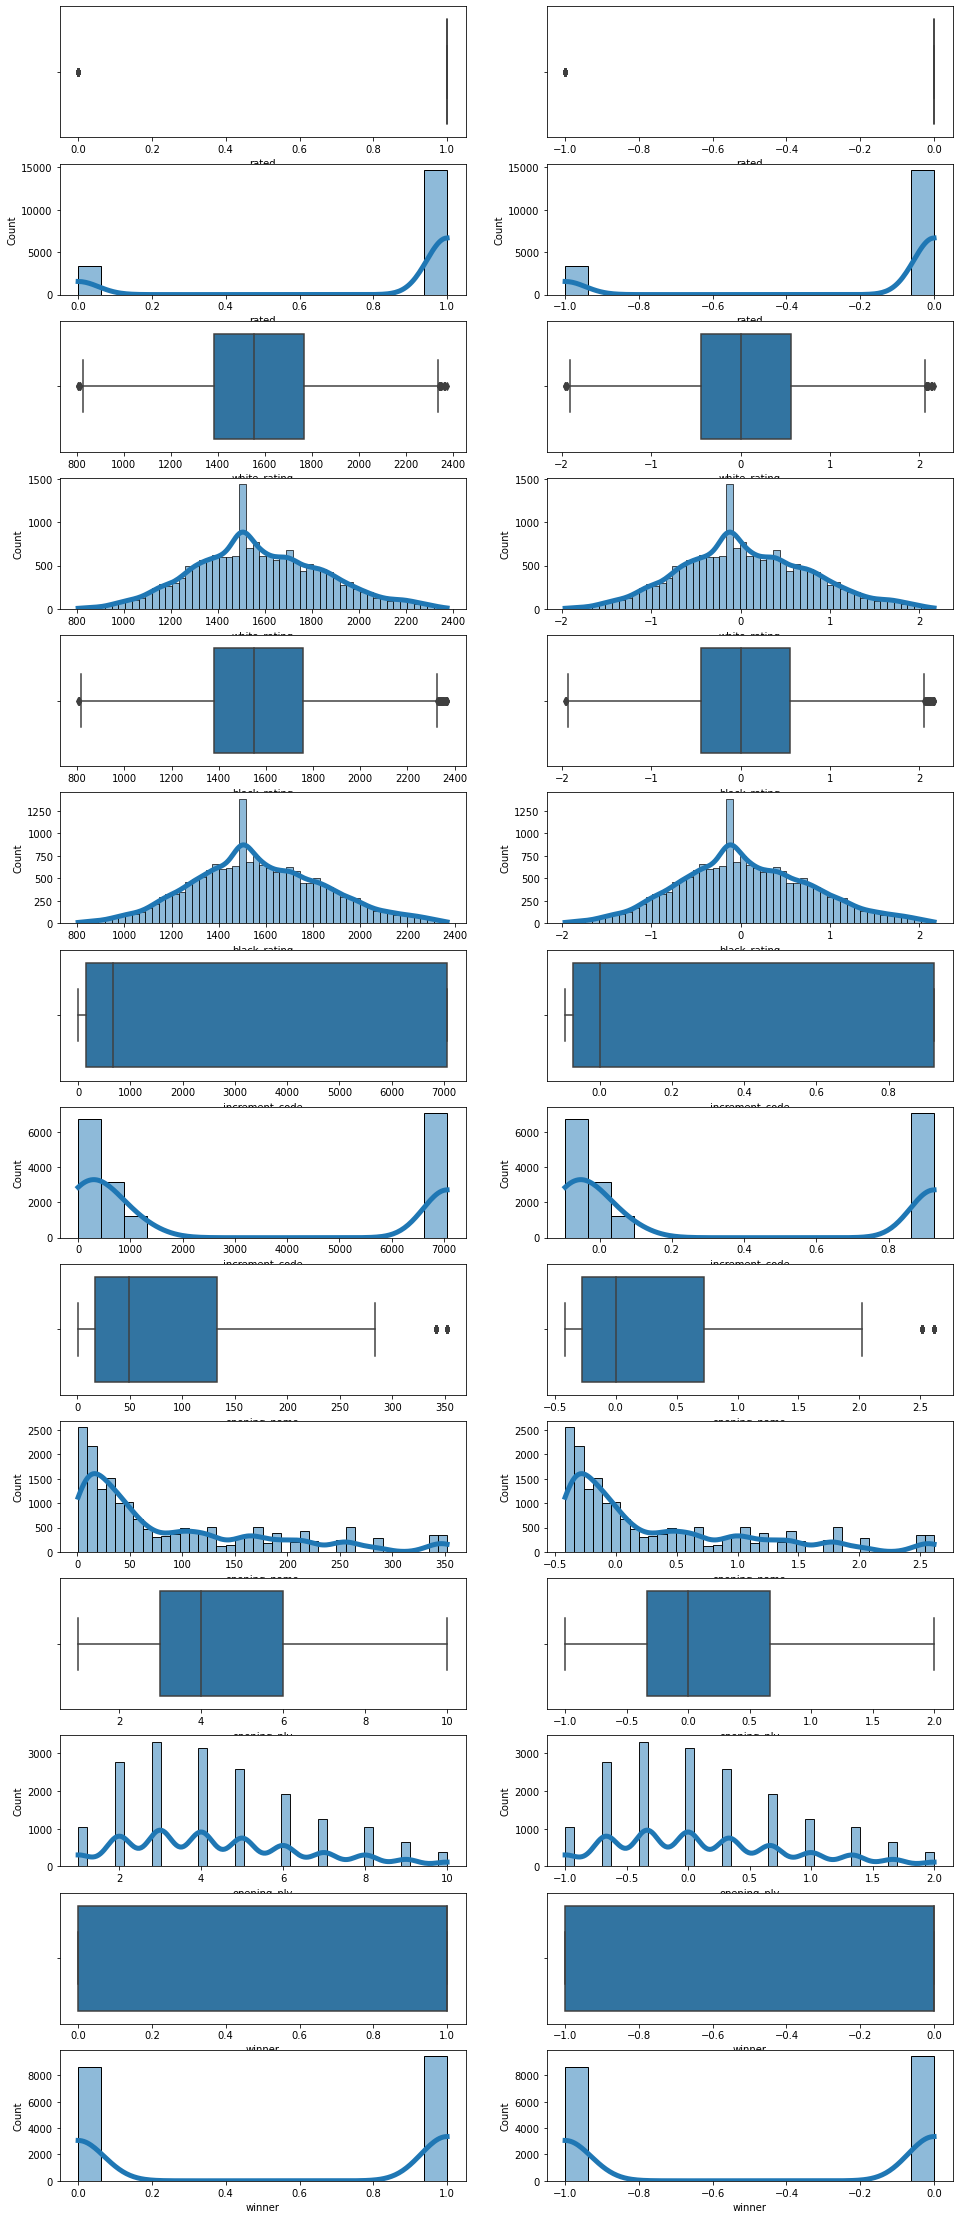

In [ ]:
get_the_plot(df,df_scaled_robus)

*Robus Scaler*
---
Here we can see the robus scaler also doesn't have any effect on distribution or outliers, like the previous 2 scaler techniques.

In [ ]:
df_copy = df.copy() #We create a copy so we can still refer to the original dataframe later
scaler = QuantileTransformer()
df_columns = df.columns
df_scaled_quantile_transform = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_columns)
df_scaled_quantile_transform.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0.0,0.404404,0.083083,0.200200,0.264264,0.638639,1.0
1,1.0,0.178679,0.129630,0.241241,0.070070,0.479980,0.0
2,1.0,0.380380,0.417918,0.241241,0.758258,0.301802,1.0
3,1.0,0.312312,0.338839,0.359359,0.680681,0.301802,1.0
4,1.0,0.457457,0.357357,0.029029,0.728729,0.638639,1.0
5,1.0,0.453453,0.303303,1.000000,0.022523,1.000000,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

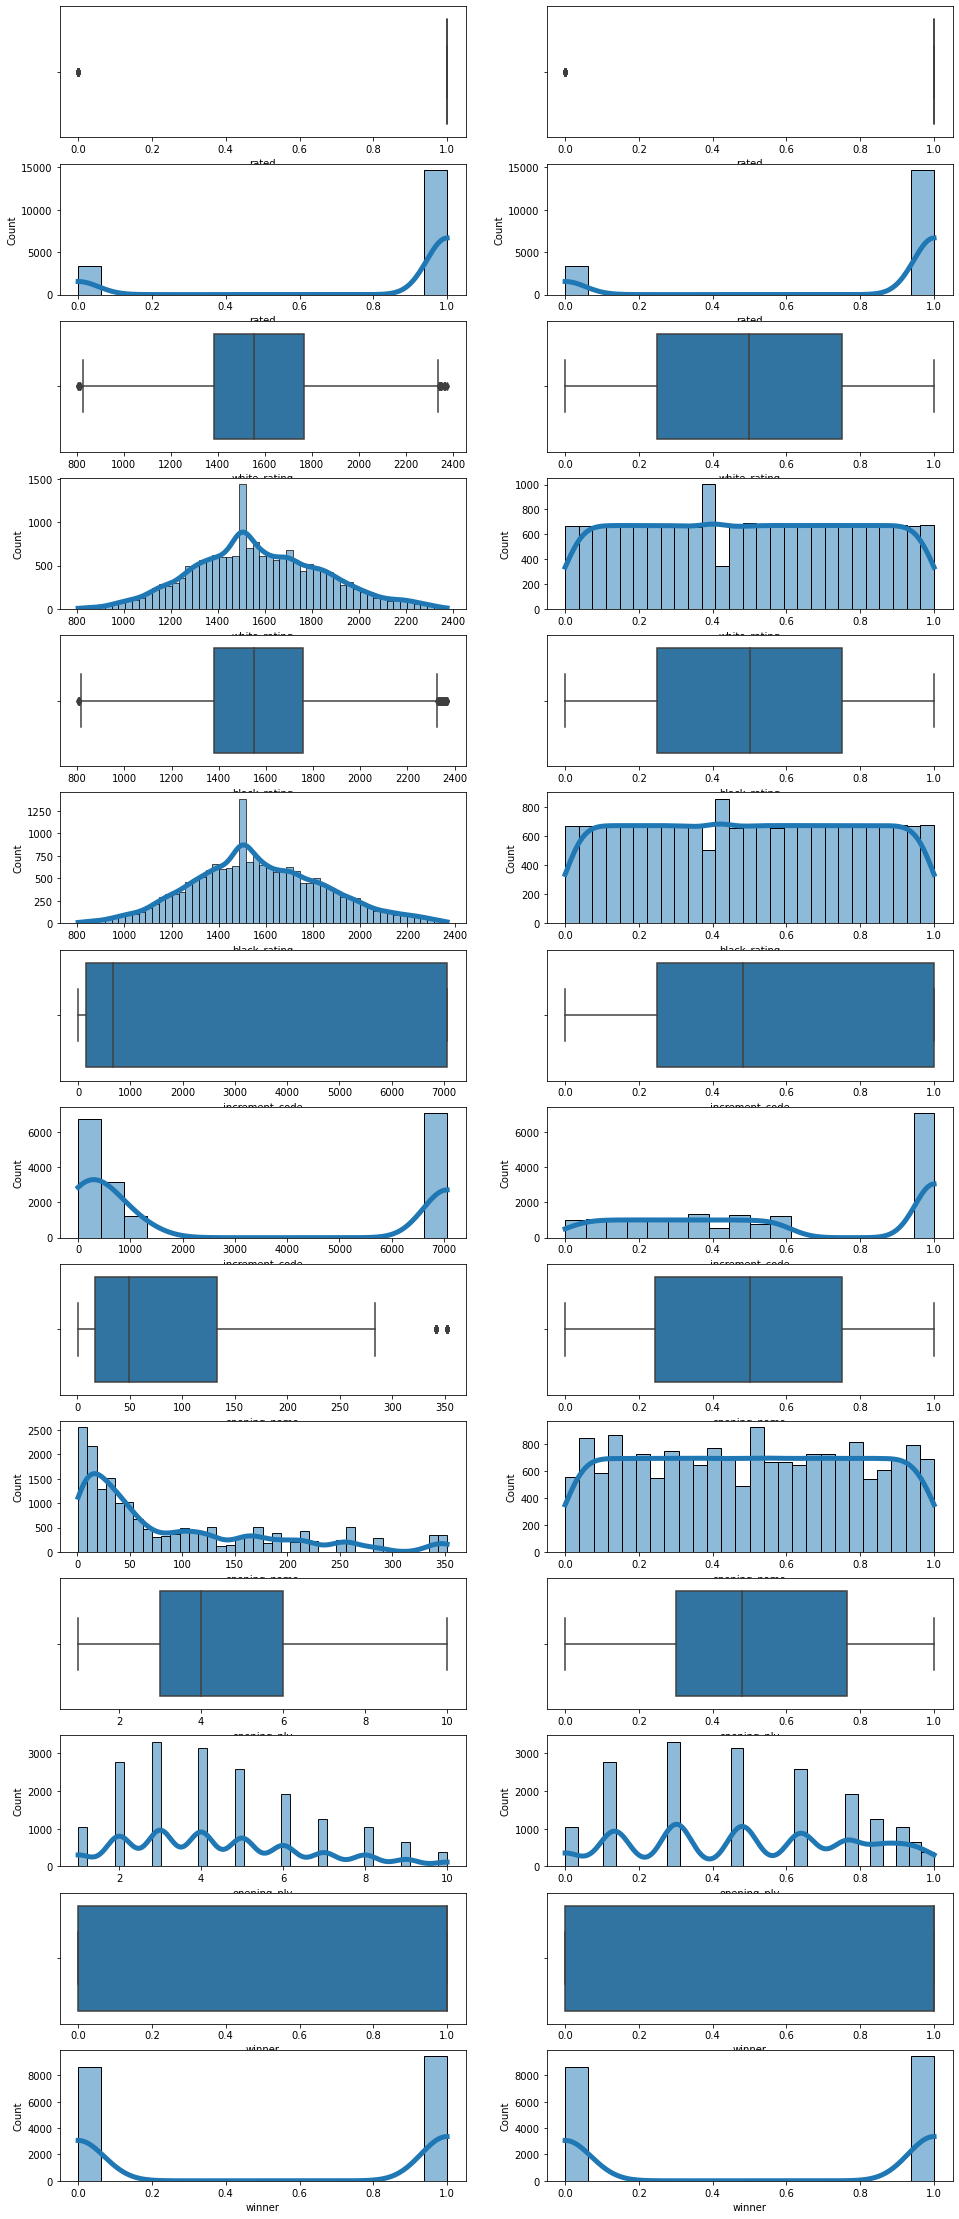

In [ ]:
get_the_plot(df,df_scaled_quantile_transform)

*Quantile transfoirmer*
---
This tranformation menthod unlike the previous ones have some influence over the distribution because when we compare the plots before and after you can clearly see interms of the distribution of white and black rating the scaling has changed shape of the distribution. which was normal before now the distribution is similar to a uniform distribution. An when it comes to the distribution of the opening name it has apositive skewed distriuyion but after the scaling it approximates to a normal distribution.

In [ ]:
df_copy = df.copy() #We create a copy so we can still refer to the original dataframe later
df_z_score= df_copy.apply(zscore)
df_z_score['winner']=df_z_score['winner'].apply(np.ceil)
df_z_score.head()

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,-2.079876,-0.281010,-1.357896,-0.891198,-0.761640,0.252681,1.0
1,0.480798,-0.922183,-1.108511,-0.875274,-0.914937,-0.199002,-1.0
2,0.480798,-0.295419,-0.257040,-0.875274,0.672777,-0.650685,1.0
3,0.480798,-0.500738,-0.420922,-0.792284,0.201938,-0.650685,1.0
4,0.480798,-0.198162,-0.367482,-0.915697,0.409983,0.252681,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

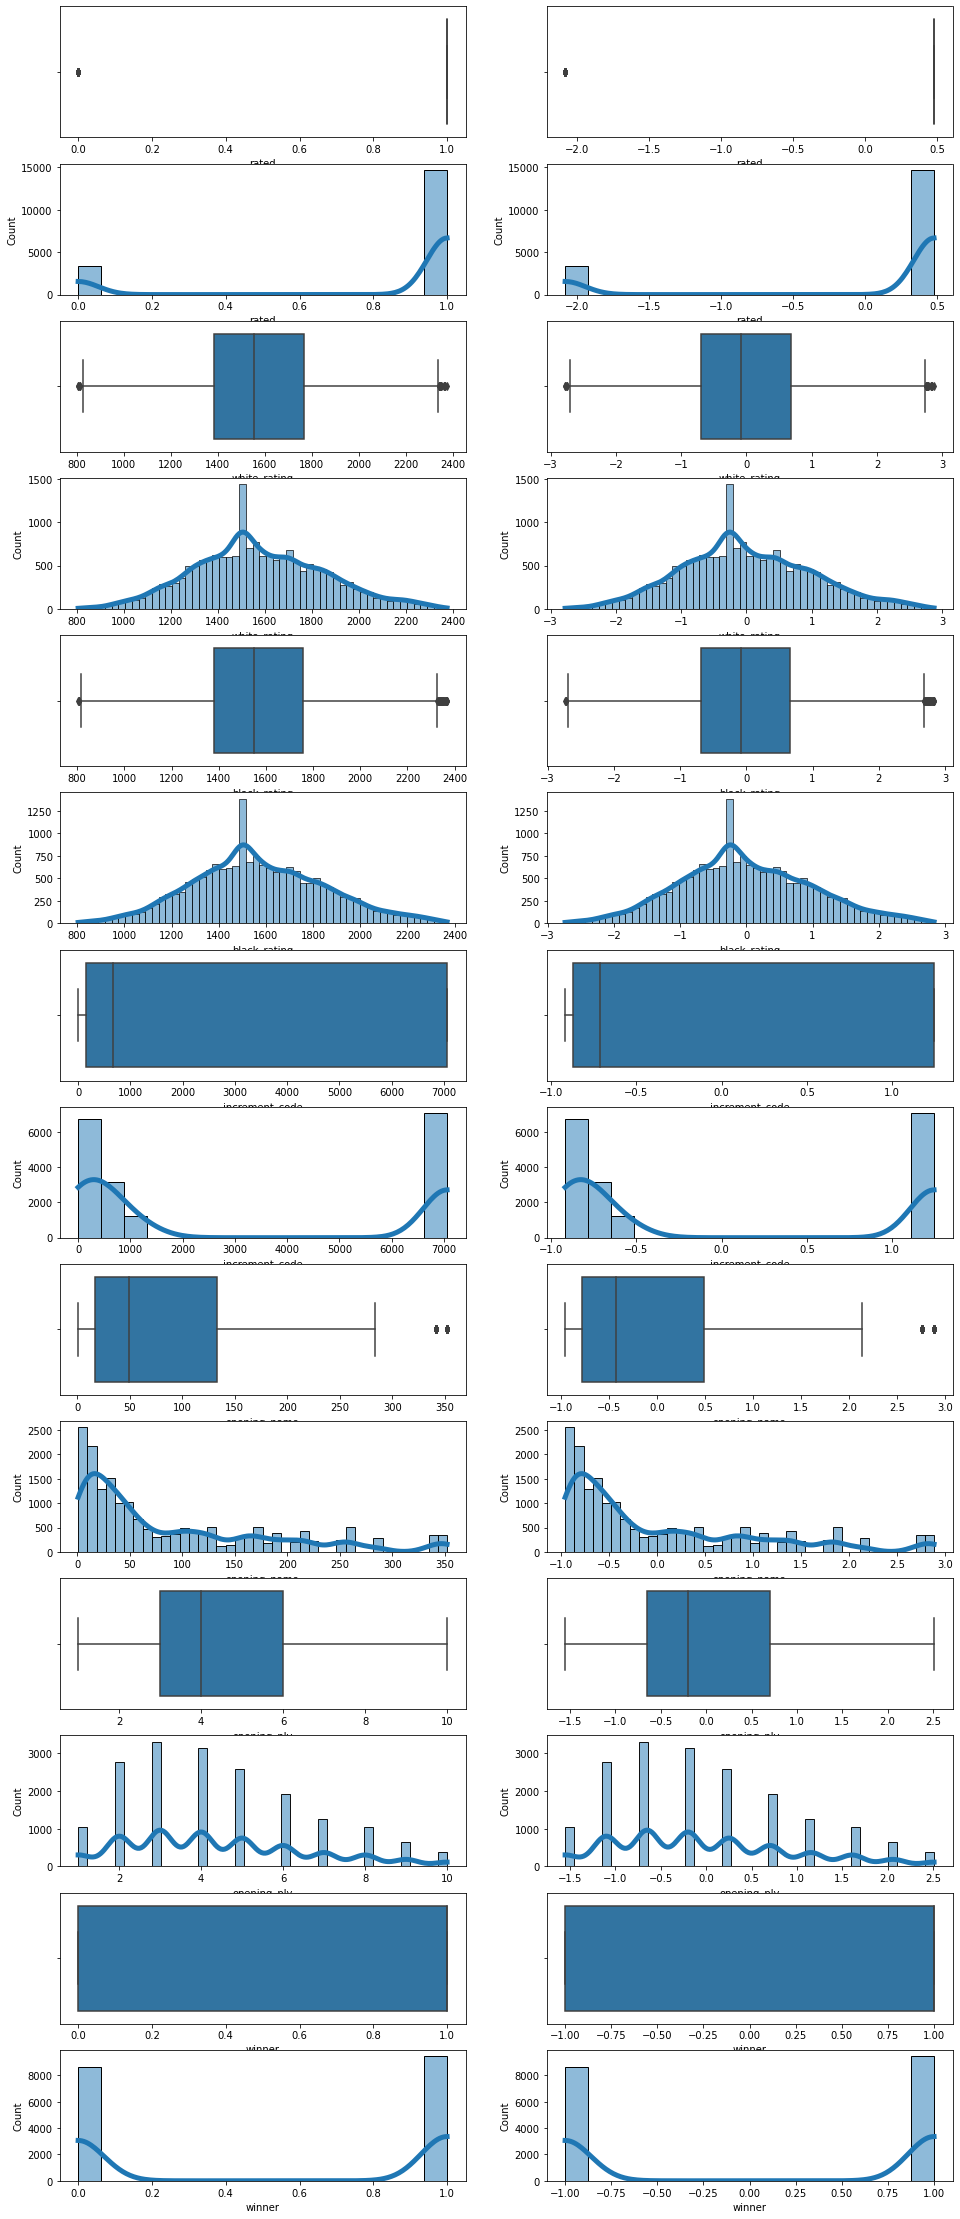

In [ ]:
get_the_plot(df,df_z_score)

*Z-Score Tranformer*
---
In terms of z score transformer it hasn't done any effect on the distribution of the attributes.

In [ ]:
#log transformastion
df_copy=df.copy()
scaler=FunctionTransformer(np.log1p)
df_columns = df.columns
df_scaled_log_transform = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_columns)
df_scaled_log_transform['winner']=df_scaled_log_transform['winner'].apply(np.ceil)
df_scaled_log_transform.head(6)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply,winner
0,0.000000,7.313887,7.083388,4.465908,2.995732,1.791759,1.0
1,0.693147,7.187657,7.140453,4.934474,1.791759,1.609438,0.0
2,0.693147,7.311218,7.313887,4.934474,5.017280,1.386294,1.0
3,0.693147,7.272398,7.282761,6.016157,4.682131,1.386294,1.0
4,0.693147,7.329094,7.293018,1.945910,4.844187,1.791759,1.0
6,0.693147,7.327123,7.261225,8.862767,1.098612,2.397895,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

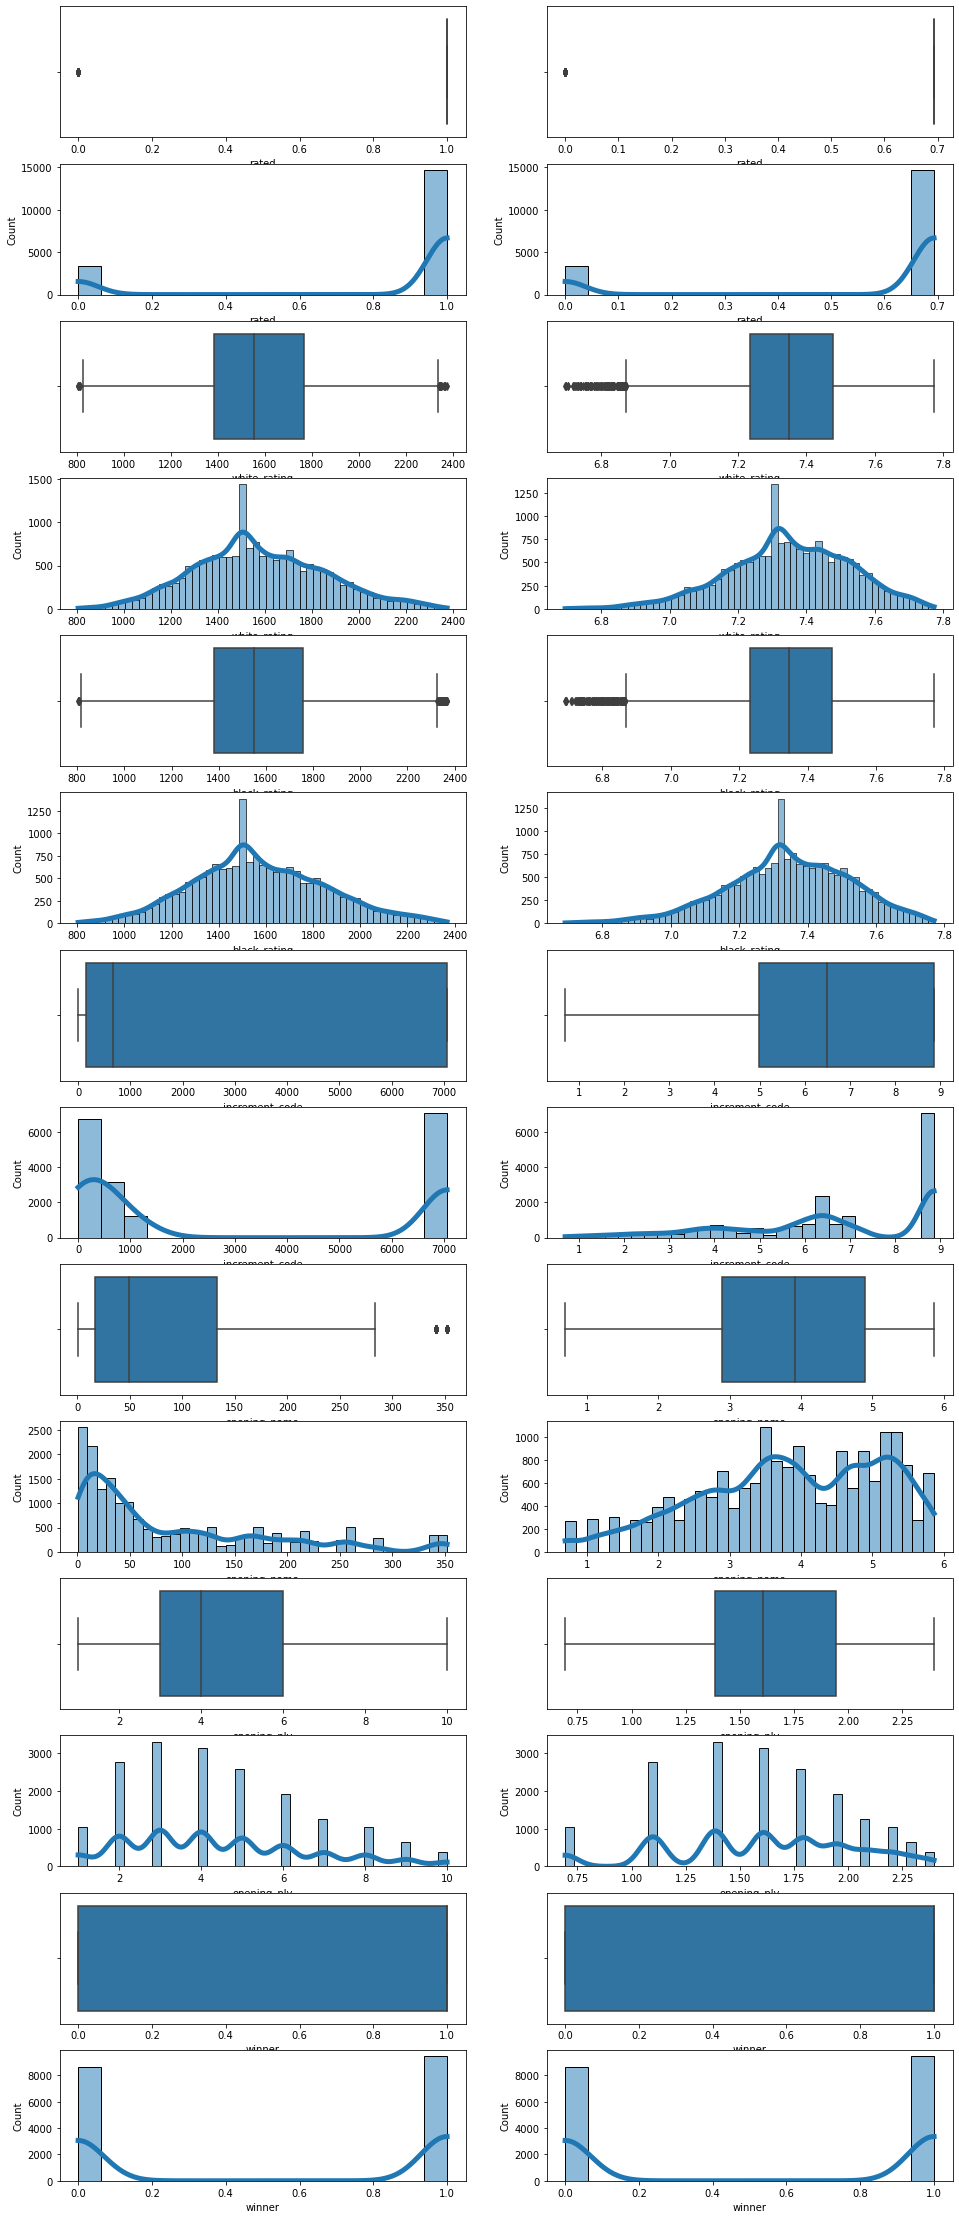

In [ ]:
get_the_plot(df,df_scaled_log_transform)

*Log Transformation*
---
In this transformation you can see that the model is trying to approximate the distributions to a normal distribution. The distributions are already normal hasn't changed its shape but distributions which arepositively skewed changedits shape transformed to a normal distribution.

**Handling missing data and outliers**
---
In this section we have to replace the outliers we selected in the first iteration and replacve them with a propoer centrality meassure. And we treat the set of outliers as our testing set, furthermore we  are going to use 2 classification algorithms and feed those algorithms with all the scaled datasets and train them and obtain results by doing cross validation and plot box plots for each combination and try to evaluate the best combination beased on those boxplots. 

In [ ]:
#original data set - df_oiriginal
#dataset without outliers - df
#lets's take the dataset with outlier - df_outliers
print(df_original.shape)
print(df.shape)
print(df_outliers.shape)

(19108, 7)
(18108, 7)
(1000, 7)


###Evaluating scaling technique and model combination.
---
In this step we are going to train the model using the dataset without the outliers. So we are going to use each dataset we obtained using scaling methods to train the model.<br/>

For this as per the requirements we have chosen 2 classification algorithms to experminet with all our sacled datasets.


1.  Knn
2.  SVM 
---
SO we are doing the cross valiadation for all our combinations (scaling x algorithm) and then create box p[lots based on their cv perfromance and then try to select the  best combination out of that.



In [ ]:
# we have created two functions to get the cross valiadation scores
#1st function gives you theknn cross validation score
#2nd function gives you the svm cross validation score
def get_cross_val(df_para):
  X =df_para.iloc[:,:-1]
  y = df_para.iloc[: , -1]
  X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=30,random_state=3)
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train,y_train)
  knn_cv=KNeighborsClassifier(n_neighbors=6)
  cv_scores = cross_val_score(knn_cv,X,y,cv=5)
  return cv_scores
  #sns.boxplot(cv_scores)
  #print(cv_scores)

def get_cross_val_2(df_para):
  X =df_para.iloc[:,:-1]
  y = df_para.iloc[: , -1]
  X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=30,random_state=3)
  classifier=svm.SVC(kernel='linear', gamma ='auto',C=2)
  classifier.fit(X_train,y_train)
  cv_scores = cross_val_score(classifier, X, y, cv=5)
  return cv_scores

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

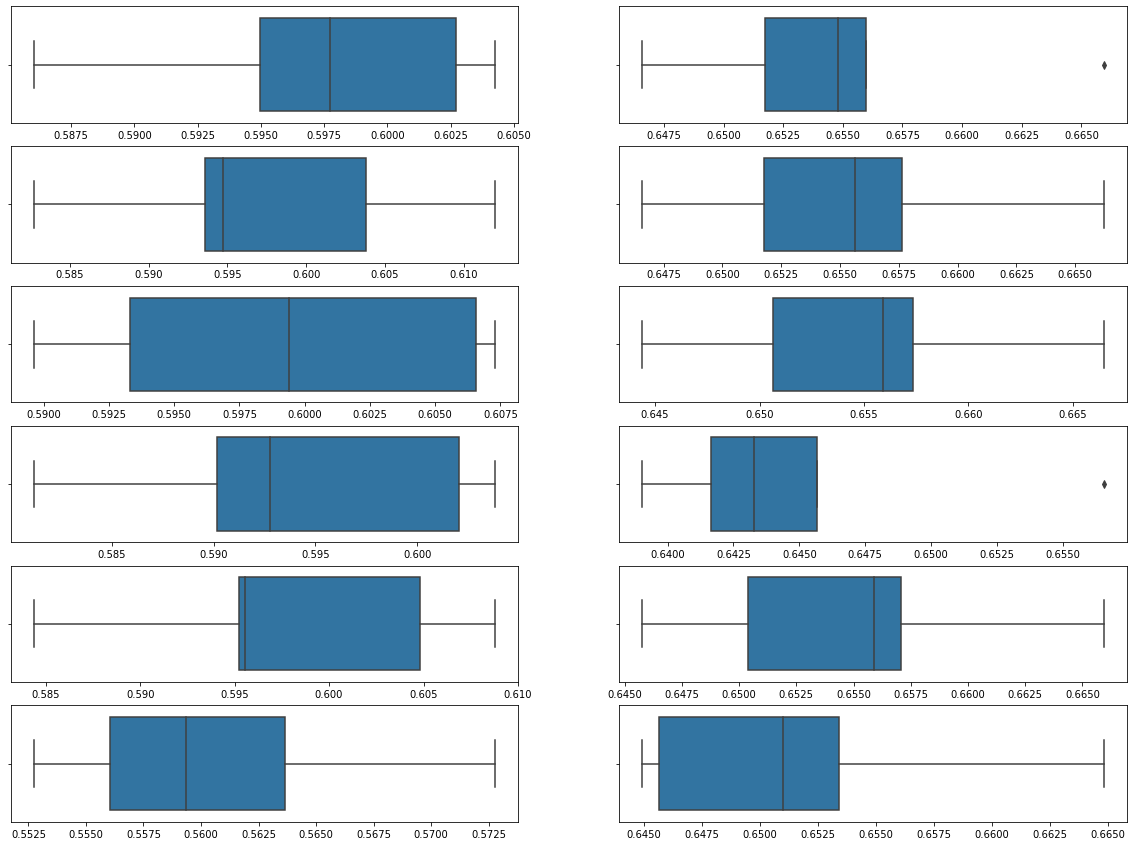

In [ ]:
#Here we have plotted each boxplot obtained by each cross validation score in a single diagram
fig, axs = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20,15)
sns.boxplot(get_cross_val(df_scaled_minmax),ax=axs[0,0])
sns.boxplot(get_cross_val(df_scaled_maxabs),ax=axs[1,0])
sns.boxplot(get_cross_val(df_scaled_robus),ax=axs[2,0])
sns.boxplot(get_cross_val(df_scaled_quantile_transform),ax=axs[3,0])
sns.boxplot(get_cross_val_2(df_scaled_minmax),ax=axs[0,1])
sns.boxplot(get_cross_val_2(df_scaled_maxabs),ax=axs[1,1])
sns.boxplot(get_cross_val_2(df_scaled_robus),ax=axs[2,1])
sns.boxplot(get_cross_val_2(df_scaled_quantile_transform),ax=axs[3,1])
sns.boxplot(get_cross_val(df_z_score),ax=axs[4,0])
sns.boxplot(get_cross_val(df_scaled_log_transform),ax=axs[5,0])
sns.boxplot(get_cross_val_2(df_z_score),ax=axs[4,1])
sns.boxplot(get_cross_val_2(df_scaled_log_transform),ax=axs[5,1])

[Text(0, 0, 'minmax x knn'),
 Text(0, 0, 'maxabs x knn'),
 Text(0, 0, 'robus x knn'),
 Text(0, 0, 'quantile x knn'),
 Text(0, 0, 'z_score x knn'),
 Text(0, 0, 'log transform x knn'),
 Text(0, 0, 'minmax x svm'),
 Text(0, 0, 'maxabs x svm'),
 Text(0, 0, 'robus x svm'),
 Text(0, 0, 'quantile x svm'),
 Text(0, 0, 'z_score x svm'),
 Text(0, 0, 'log transform x svm')]

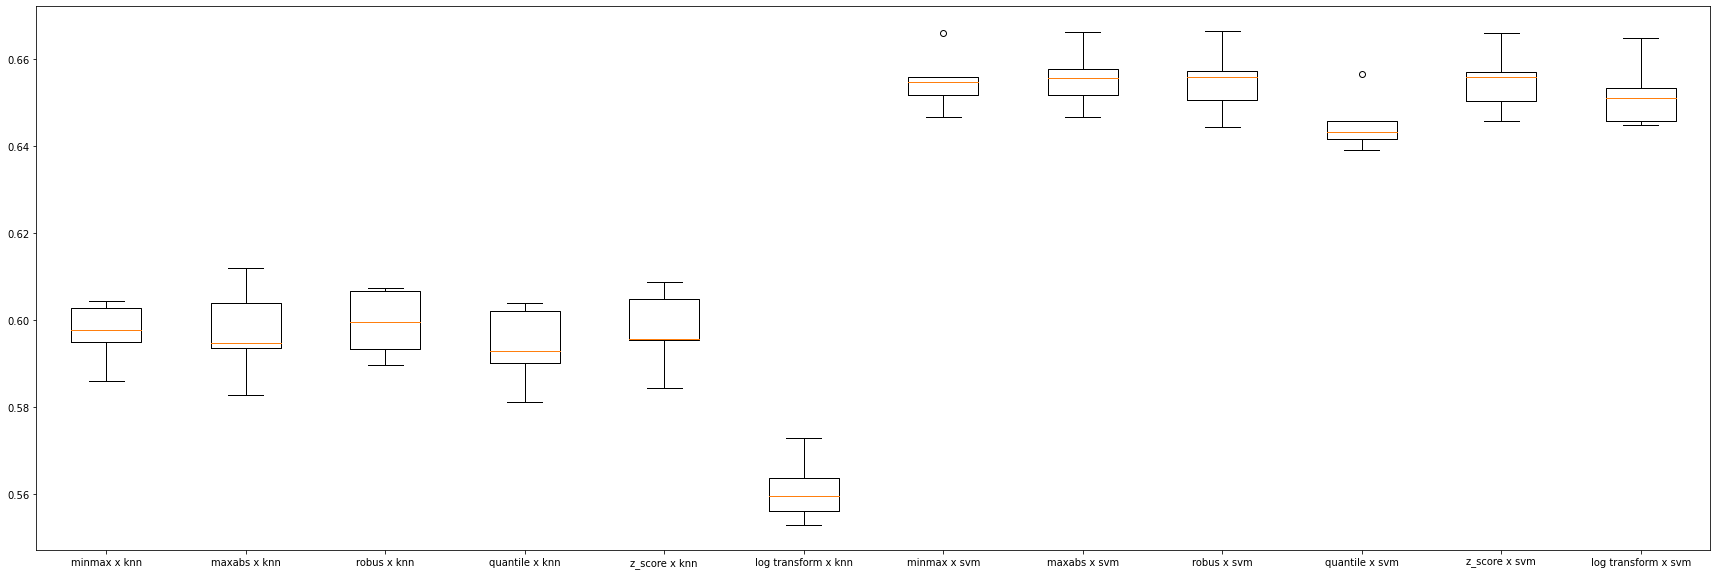

In [ ]:
#In order to see a clear comparison let's take all the plots in the same scale
my_dict ={'minmax x knn' : get_cross_val(df_scaled_minmax),
          'maxabs x knn': get_cross_val(df_scaled_maxabs),                                   
          'robus x knn' : get_cross_val(df_scaled_robus),
          'quantile x knn' : get_cross_val(df_scaled_quantile_transform),
          'z_score x knn' : get_cross_val(df_z_score),
          'log transform x knn' : get_cross_val(df_scaled_log_transform),
          'minmax x svm' : get_cross_val_2(df_scaled_minmax),
          'maxabs x svm': get_cross_val_2(df_scaled_maxabs),                                   
          'robus x svm' : get_cross_val_2(df_scaled_robus),
          'quantile x svm' : get_cross_val_2(df_scaled_quantile_transform),
          'z_score x svm' : get_cross_val_2(df_z_score),
          'log transform x svm' : get_cross_val_2(df_scaled_log_transform)
}
fig, ax = plt.subplots()
fig.set_size_inches(30,10)
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

*Best Combination*
---
So the above diagram we have obtained the box plots that were ploltted using the cross validation scores obtained by using each scaling technnique and classification algorithm. so going through these plots we can conclude that the max absolute scaling technique coupled with Support vector machines produce the optimum combination. 

###Adjusting the outlier dataset
---
Here we are using the best scaling technique that was evaluated using the k cross validation is the previous step which is the maxabs scaling technique to scale all the outliers before that we are going to fill the outliers suing the mean of the orogonal data because the outliers are quantitaive in nature.

In [ ]:
df_outliers['white_rating']=df['white_rating'].mean()
df_outliers['black_rating']=df['black_rating'].mean()
df_outliers['opening_ply']=df['opening_ply'].mean()
df_frequency_map=df_original['increment_code'].value_counts().to_dict()
df_outliers.increment_code=df_original.increment_code.map(df_frequency_map)
df_frequency_map=df_original['opening_name'].value_counts().to_dict()
df_outliers.opening_name=df_original.opening_name.map(df_frequency_map)
df_outlier_rated=preprocessing.LabelEncoder().fit_transform(df_outliers['rated'])
df_outliers['rated']=df_outlier_rated
df_outlier_winner=preprocessing.LabelEncoder().fit_transform(df_outliers['winner'])
df_outliers['winner']=df_outlier_winner

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

###Training and predicting the values
---
So here in this step we have the outliers dataset which have been propoerly scaled using the best scaling technique we evaluated trhough our cross validation score box plots diagram. Now we can use the best classification algorithm we obtained to predict the outlier data set.

In [ ]:
scaler = MaxAbsScaler()
df_outlier_columns = df_outliers.columns
df_outliers_scaled_maxabs = pd.DataFrame(scaler.fit_transform(df_outliers), columns=df_columns)
del df_outliers_scaled_maxabs['winner']
df_outliers_scaled_maxabs.head(10)

,rated,white_rating,black_rating,increment_code,opening_name,opening_ply
0,0.0,1.0,1.0,0.170020,0.014577,1.0
1,0.0,1.0,1.0,0.021067,0.125364,1.0
2,0.0,1.0,1.0,0.000540,0.011662,1.0
3,0.0,1.0,1.0,0.000540,0.014577,1.0
4,0.0,1.0,1.0,0.000540,0.737609,1.0
5,1.0,1.0,1.0,0.040108,0.014577,1.0
6,1.0,1.0,1.0,1.000000,0.026239,1.0
7,1.0,1.0,1.0,0.109521,0.081633,1.0
8,1.0,1.0,1.0,0.109521,0.081633,1.0
9,1.0,1.0,1.0,0.109521,0.081633,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


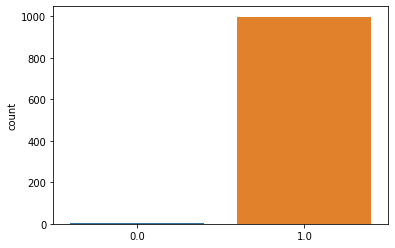

In [ ]:
X =df_scaled_maxabs.iloc[:,:-1]
y = df_scaled_maxabs.iloc[: , -1]
classifier=svm.SVC(kernel='linear', gamma ='auto',C=2)
classifier.fit(X,y)
y_predict = classifier.predict(df_outliers_scaled_maxabs)
sns.countplot(y_predict)
